# Alzheimer's Disease Prediction

**Author:** TechHive  
**Date:** February 2026  
**Project:** Alzheimer's Disease Risk Assessment

---

## Executive Summary

This notebook presents a comprehensive end-to-end machine learning workflow for predicting Alzheimer's disease using clinical and demographic patient data. The analysis includes:

- **Data Quality Assessment**: Validation of data integrity and completeness
- **Exploratory Data Analysis**: Understanding feature distributions and relationships
- **Feature Engineering**: Dimensionality reduction using Principal Component Analysis (PCA)
- **Data Preprocessing**: Normalization and standardization for model readiness
- **Model Development**: Training and evaluating predictive models
- **Statistical Insights**: Identifying key predictors and patterns

**Objective:** Build a robust predictive model for Alzheimer's disease diagnosis while leveraging dimensionality reduction techniques.

---

## 1. Environment Setup

Importing necessary libraries for data manipulation, statistical analysis, and visualization.

In [37]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Configuration
import warnings
warnings.filterwarnings("ignore")

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Data Loading

Loading the Alzheimer's disease dataset containing patient demographics, lifestyle factors, clinical measurements, and diagnosis outcomes.

In [38]:
# Load the dataset
df = pd.read_csv('data/alzheimers_disease_data.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nFirst few records:")
df.head()

Dataset shape: 2,149 rows × 35 columns

First few records:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.93,0,13.30,6.33,1.35,9.03,0,0,1,1,0,0,142,72,242.37,56.15,33.68,162.19,21.46,6.52,0,0,1.73,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.83,0,4.54,7.62,0.52,7.15,0,0,0,0,0,0,115,64,231.16,193.41,79.03,294.63,20.61,7.12,0,0,2.59,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.80,0,19.56,7.84,1.83,9.67,1,0,0,0,0,0,99,116,284.18,153.32,69.77,83.64,7.36,5.90,0,0,7.12,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.80,1,12.21,8.43,7.44,8.39,0,0,0,0,0,0,118,115,159.58,65.37,68.46,277.58,13.99,8.97,0,1,6.48,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.72,0,18.45,6.31,0.80,5.60,0,0,0,0,0,0,94,117,237.60,92.87,56.87,291.20,13.52,6.05,0,0,0.01,0,0,1,1,0,0,XXXConfid


## 3. Exploratory Data Analysis (EDA)

### 3.1 Data Structure and Quality Assessment

Understanding the data types, missing values, and overall data quality.

In [39]:
# Dataset structure
print("=" * 60)
print("DATA STRUCTURE")
print("=" * 60)
df.info()

print("\n" + "=" * 60)
print("DATA QUALITY CHECK")
print("=" * 60)
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"\nTarget variable distribution:")
print(df['Diagnosis'].value_counts())
print(f"\nUnique patients: {df['PatientID'].nunique()}")

DATA STRUCTURE
<class 'pandas.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   i

### 3.2 Statistical Summary

Examining the distribution and central tendencies of numerical features.

In [40]:
# Statistical summary of numerical features
summary = df.describe().T
summary['range'] = summary['max'] - summary['min']
summary['cv'] = (summary['std'] / summary['mean']) * 100  # Coefficient of variation

print("Descriptive Statistics (Numerical Features):")
summary[['mean', 'std', 'min', 'max', 'range', 'cv']].round(2)

Descriptive Statistics (Numerical Features):


,mean,std,min,max,range,cv
PatientID,5825.00,620.51,4751.00,6899.00,2148.00,10.65
Age,74.91,8.99,60.00,90.00,30.00,12.00
Gender,0.51,0.50,0.00,1.00,1.00,98.77
Ethnicity,0.70,1.00,0.00,3.00,3.00,142.81
EducationLevel,1.29,0.90,0.00,3.00,3.00,70.30
BMI,27.66,7.22,15.01,39.99,24.98,26.10
Smoking,0.29,0.45,0.00,1.00,1.00,157.08
AlcoholConsumption,10.04,5.76,0.00,19.99,19.99,57.35
PhysicalActivity,4.92,2.86,0.00,9.99,9.98,58.07
DietQuality,4.99,2.91,0.01,10.00,9.99,58.26


### 3.3 Data Visualization & Insights

Visualizing feature distributions, correlations, and target variable balance to identify patterns and potential issues.

In [ ]:
# Configure visualization aesthetics
sns.set_palette("husl")
plt.style.use('seaborn-v0_8-darkgrid')

# For visualization, we use the raw dataframe 'df' but exclude non-predictive columns
selected_df = df.drop(columns=['PatientID', 'DoctorInCharge']).copy()

# 1. Feature Distributions
num_features = len(selected_df.columns)
ncols = 4
nrows = int(np.ceil(num_features / ncols))

fig = plt.figure(figsize=(18, nrows * 3))
selected_df.hist(bins=30, edgecolor='black', linewidth=0.5, ax=fig.gca(), layout=(nrows, ncols))
plt.suptitle('Distribution of Selected Features', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("📊 Observation: Examining the feature distributions helps identify skewness and scaling needs.\n")

# 2. Correlation Analysis
fig, ax = plt.subplots(figsize=(14, 10))
correlation_matrix = selected_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='RdYlBu_r', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8}, ax=ax)
plt.title('Feature Correlation Matrix (Lower Triangle)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify strong correlations
strong_corr = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
strong_corr = strong_corr[strong_corr != 1.0].stack().drop_duplicates()
if len(strong_corr) > 0:
    print(f"⚠️  Strong correlations detected (|r| > 0.7):")
    for idx, val in strong_corr.items():
        print(f"   • {idx[0]} ↔ {idx[1]}: {val:.3f}")
else:
    print("✓ No multicollinearity issues detected (all |r| < 0.7)\n")

# 3. Target Variable Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
diagnosis_counts = selected_df['Diagnosis'].value_counts()
axes[0].bar(diagnosis_counts.index, diagnosis_counts.values, color=['#2ecc71', '#e74c3c'],
            edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Diagnosis', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Diagnosis Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add percentage labels
total = diagnosis_counts.sum()
for i, (idx, val) in enumerate(diagnosis_counts.items()):
    percentage = (val / total) * 100
    axes[0].text(i, val + 20, f'{val}\n({percentage:.1f}%)',
            ha='center', fontweight='bold', fontsize=11)

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(diagnosis_counts.values, labels=[f'Class {i}' for i in diagnosis_counts.index],
       autopct='%1.1f%%', colors=colors, startangle=90,
       textprops={'fontsize': 12, 'fontweight': 'bold'},
       wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
axes[1].set_title('Target Class Balance', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Class balance analysis
balance_ratio = diagnosis_counts.min() / diagnosis_counts.max()
print(f"\n📈 Target Variable Analysis:")
print(f"   • Class balance ratio: {balance_ratio:.2f}")
if balance_ratio < 0.5:
    print(f"   ⚠️  Imbalanced dataset detected. Consider using SMOTE or class weights.")
else:
    print(f"   ✓ Dataset is reasonably balanced.")

## 4. Feature Engineering

### 4.1 Feature Preparation for Dimensionality Reduction

**Methodology:** Preparing features for Principal Component Analysis (PCA). PCA is applied here to reduce dimensionality while retaining maximum variance.

**Benefits:**
- Reduces model complexity and computational cost
- Mitigates multicollinearity issues
- Improves model generalization
- Retains interpretability through variance explanation

Features are standardized and transformed using PCA in this section.

In [41]:
# 4.2 Feature Preparation for PCA
X = df.drop(columns=['Diagnosis', 'PatientID', 'DoctorInCharge'])
y = df['Diagnosis']

# Standardize features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("=" * 60)
print("FEATURE PREPARATION FOR PCA")
print("=" * 60)
print(f"Total features available: {len(X.columns)}")
print(f"Total samples: {len(X):,}")
print(f"\nAll features will be standardized and reduced using PCA in the modeling pipeline.")
print(f"\nFeatures to be used:")
for i, feat in enumerate(X.columns, 1):
    print(f"  {i:2d}. {feat}")

# Create dataset for visualization (all features)
selected_df = df.drop(columns=['PatientID', 'DoctorInCharge']).copy()
print(f"\nDataset shape for visualization: {selected_df.shape}")
selected_df.head()

FEATURE PREPARATION FOR PCA
Total features available: 32
Total samples: 2,149

All features will be standardized and reduced using PCA in the modeling pipeline.

Features to be used:
   1. Age
   2. Gender
   3. Ethnicity
   4. EducationLevel
   5. BMI
   6. Smoking
   7. AlcoholConsumption
   8. PhysicalActivity
   9. DietQuality
  10. SleepQuality
  11. FamilyHistoryAlzheimers
  12. CardiovascularDisease
  13. Diabetes
  14. Depression
  15. HeadInjury
  16. Hypertension
  17. SystolicBP
  18. DiastolicBP
  19. CholesterolTotal
  20. CholesterolLDL
  21. CholesterolHDL
  22. CholesterolTriglycerides
  23. MMSE
  24. FunctionalAssessment
  25. MemoryComplaints
  26. BehavioralProblems
  27. ADL
  28. Confusion
  29. Disorientation
  30. PersonalityChanges
  31. DifficultyCompletingTasks
  32. Forgetfulness

Dataset shape for visualization: (2149, 33)


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.93,0,13.30,6.33,1.35,9.03,0,0,1,1,0,0,142,72,242.37,56.15,33.68,162.19,21.46,6.52,0,0,1.73,0,0,0,1,0,0
1,89,0,0,0,26.83,0,4.54,7.62,0.52,7.15,0,0,0,0,0,0,115,64,231.16,193.41,79.03,294.63,20.61,7.12,0,0,2.59,0,0,0,0,1,0
2,73,0,3,1,17.80,0,19.56,7.84,1.83,9.67,1,0,0,0,0,0,99,116,284.18,153.32,69.77,83.64,7.36,5.90,0,0,7.12,0,1,0,1,0,0
3,74,1,0,1,33.80,1,12.21,8.43,7.44,8.39,0,0,0,0,0,0,118,115,159.58,65.37,68.46,277.58,13.99,8.97,0,1,6.48,0,0,0,0,0,0
4,89,0,0,0,20.72,0,18.45,6.31,0.80,5.60,0,0,0,0,0,0,94,117,237.60,92.87,56.87,291.20,13.52,6.05,0,0,0.01,0,0,1,1,0,0


### 4.3 Principal Component Analysis (PCA)

Applying PCA to reduce dimensionality while retaining 95% of the total variance.

PCA RESULTS
Original features:     32
PCA components:        31
Variance retained:     97.4932%
X_pca shape:           (2149, 31)

Explained variance per component:
  PC 1: 0.0378  (cumulative: 0.0378)
  PC 2: 0.0374  (cumulative: 0.0753)
  PC 3: 0.0369  (cumulative: 0.1122)
  PC 4: 0.0367  (cumulative: 0.1488)
  PC 5: 0.0355  (cumulative: 0.1844)
  PC 6: 0.0352  (cumulative: 0.2195)
  PC 7: 0.0346  (cumulative: 0.2541)
  PC 8: 0.0343  (cumulative: 0.2884)
  PC 9: 0.0340  (cumulative: 0.3224)
  PC10: 0.0337  (cumulative: 0.3561)
  PC11: 0.0329  (cumulative: 0.3891)
  PC12: 0.0326  (cumulative: 0.4216)
  PC13: 0.0324  (cumulative: 0.4540)
  PC14: 0.0318  (cumulative: 0.4858)
  PC15: 0.0317  (cumulative: 0.5175)
  PC16: 0.0311  (cumulative: 0.5486)
  PC17: 0.0307  (cumulative: 0.5794)
  PC18: 0.0303  (cumulative: 0.6097)
  PC19: 0.0300  (cumulative: 0.6397)
  PC20: 0.0299  (cumulative: 0.6696)
  PC21: 0.0297  (cumulative: 0.6992)
  PC22: 0.0296  (cumulative: 0.7288)
  PC23: 0.0288  (cumu

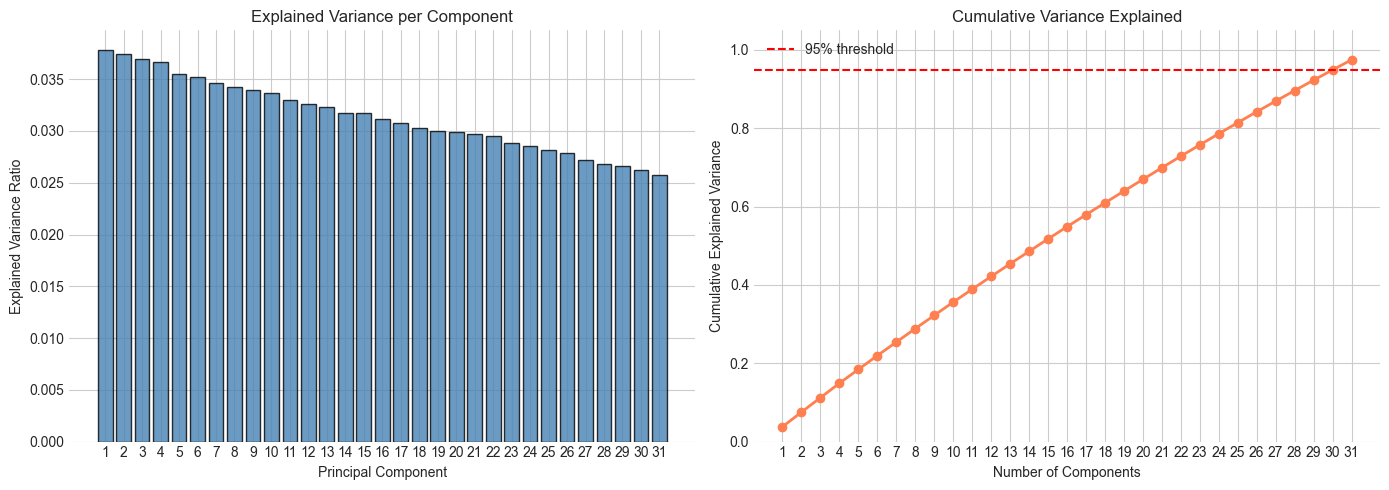

In [ ]:
# ============================================================
# 4.3 PCA — Retain ≥ 95% of variance
# ============================================================
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("=" * 60)
print("PCA RESULTS")
print("=" * 60)
print(f"Original features:     {X_scaled.shape[1]}")
print(f"PCA components:        {pca.n_components_}")
print(f"Variance retained:     {pca.explained_variance_ratio_.sum():.4%}")
print(f"X_pca shape:           {X_pca.shape}")

print(f"\nExplained variance per component:")
cumulative = 0
for i, var in enumerate(pca.explained_variance_ratio_):
    cumulative += var
    print(f"  PC{i+1:2d}: {var:.4f}  (cumulative: {cumulative:.4f})")

# Scree plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Explained variance per component
axes[0].bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_,
            color='steelblue', alpha=0.8, edgecolor='black')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Explained Variance per Component')
axes[0].set_xticks(range(1, pca.n_components_ + 1))

# Cumulative explained variance
cumvar = np.cumsum(pca.explained_variance_ratio_)
axes[1].plot(range(1, pca.n_components_ + 1), cumvar, 'o-', color='coral', linewidth=2)
axes[1].axhline(y=0.95, color='red', linestyle='--', label='95% threshold')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('Cumulative Variance Explained')
axes[1].set_xticks(range(1, pca.n_components_ + 1))
axes[1].legend()
axes[1].set_ylim([0, 1.05])

plt.tight_layout()
plt.show()

### 4.4 PCA Visualization

Visualizing the first two principal components to understand the data distribution in the reduced space.

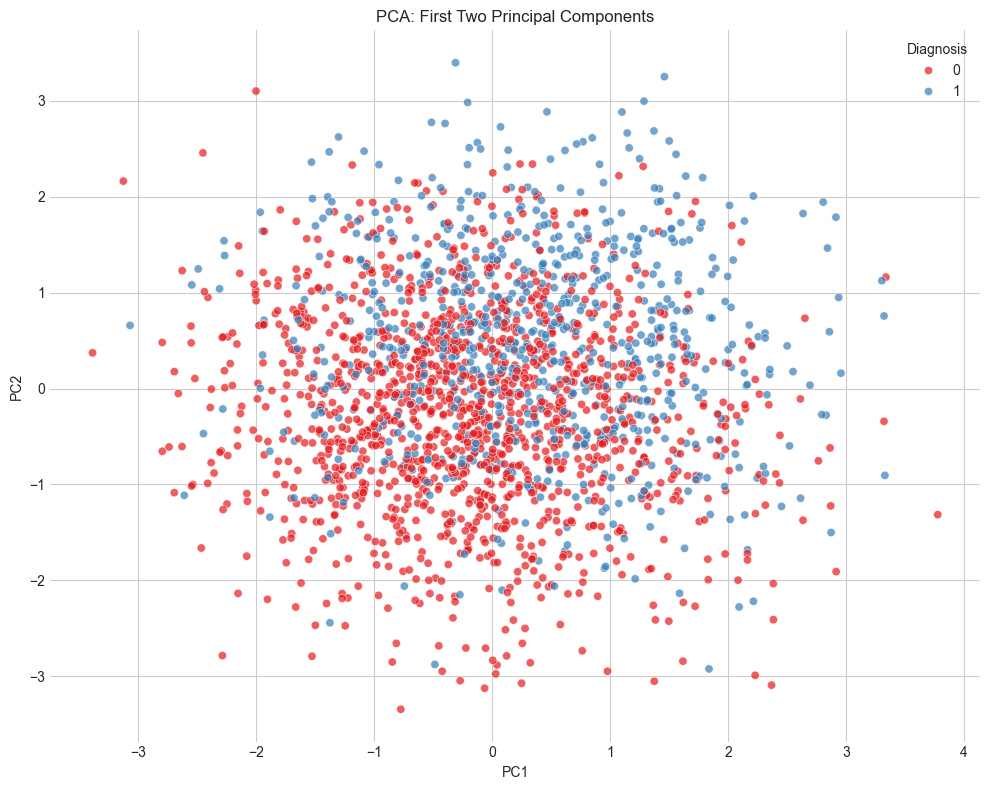

In [43]:
# 2D PCA Scatter Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1', alpha=0.7)
plt.title('PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Diagnosis')
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Modeling Pipeline

### Approach
1. **Train/Test Split** — Stratified 80/20 split on PCA-transformed data
2. **Modeling** — Train Random Forest and SVM classifiers
3. **Evaluation** — Accuracy, Classification Report, Confusion Matrix, ROC-AUC

In [48]:
# Import modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_auc_score, roc_curve)

## 5.1 Train/Test Split and Class Distribution

This section performs the stratified train/test split and analyzes the class distribution in both sets.

In [ ]:
# ============================================================
# 5.1 Train/Test Split (80/20 stratified)
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

print("=" * 60)
print("TRAIN / TEST SPLIT")
print("=" * 60)
print(f"Total samples:   {len(y):,}")
print(f"Training set:    {len(y_train):,} ({len(y_train)/len(y):.0%})")
print(f"Testing set:     {len(y_test):,} ({len(y_test)/len(y):.0%})")
print(f"\nTraining class distribution:")
print(f"  Class 0 (Healthy):    {(y_train == 0).sum()} ({(y_train == 0).mean():.1%})")
print(f"  Class 1 (Alzheimer):  {(y_train == 1).sum()} ({(y_train == 1).mean():.1%})")
print(f"\nTesting class distribution:")
print(f"  Class 0 (Healthy):    {(y_test == 0).sum()} ({(y_test == 0).mean():.1%})")
print(f"  Class 1 (Alzheimer):  {(y_test == 1).sum()} ({(y_test == 1).mean():.1%})")

TRAIN / TEST SPLIT
Total samples:   2,149
Training set:    1,719 (80%)
Testing set:     430 (20%)

Training class distribution:
  Class 0 (Healthy):    1111 (64.6%)
  Class 1 (Alzheimer):  608 (35.4%)

Testing class distribution:
  Class 0 (Healthy):    278 (64.7%)
  Class 1 (Alzheimer):  152 (35.3%)


## 5.2 Modeling

Training Random Forest and SVM classifiers with balanced class weights.

In [ ]:
# ============================================================
# 5.2 Modeling — Random Forest & SVM
# ============================================================

# --- Model 1: Random Forest ---
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# --- Model 2: SVM (RBF kernel) ---
svm_model = SVC(
    kernel='rbf',
    probability=True,
    random_state=42,
    class_weight='balanced'
)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

print("=" * 60)
print("MODELS TRAINED SUCCESSFULLY")
print("=" * 60)
print(f"\n1. Random Forest Classifier")
print(f"   - Trees: 100, Class weights: balanced")
print(f"   - Training accuracy: {rf_model.score(X_train, y_train):.4f}")
print(f"\n2. SVM (RBF Kernel)")
print(f"   - Kernel: rbf, Class weights: balanced")
print(f"   - Training accuracy: {svm_model.score(X_train, y_train):.4f}")

MODELS TRAINED SUCCESSFULLY

1. Random Forest Classifier
   - Trees: 100, Class weights: balanced
   - Training accuracy: 1.0000

2. SVM (RBF Kernel)
   - Kernel: rbf, Class weights: balanced
   - Training accuracy: 0.9308


## 5.3 Evaluation

Evaluating model performance using accuracy, ROC-AUC, classification reports, and confusion matrices.

  Random Forest
  Accuracy:  0.7814
  ROC-AUC:   0.8544

  Classification Report:
              precision    recall  f1-score   support

     Healthy       0.77      0.95      0.85       278
   Alzheimer       0.85      0.47      0.60       152

    accuracy                           0.78       430
   macro avg       0.81      0.71      0.73       430
weighted avg       0.79      0.78      0.76       430

  SVM (RBF)
  Accuracy:  0.8233
  ROC-AUC:   0.8936

  Classification Report:
              precision    recall  f1-score   support

     Healthy       0.89      0.83      0.86       278
   Alzheimer       0.72      0.81      0.76       152

    accuracy                           0.82       430
   macro avg       0.81      0.82      0.81       430
weighted avg       0.83      0.82      0.83       430



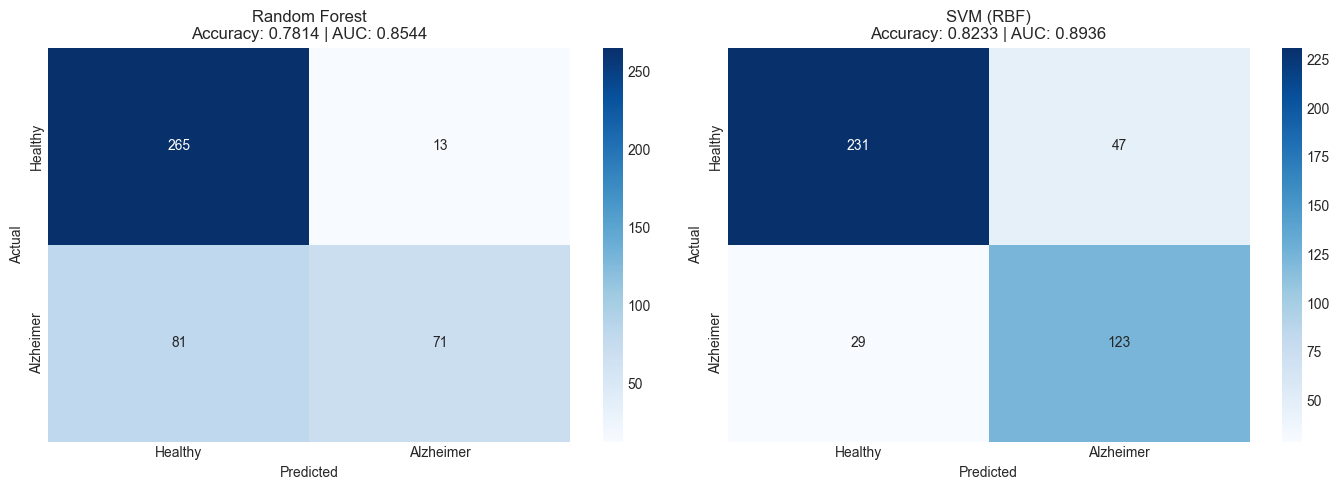

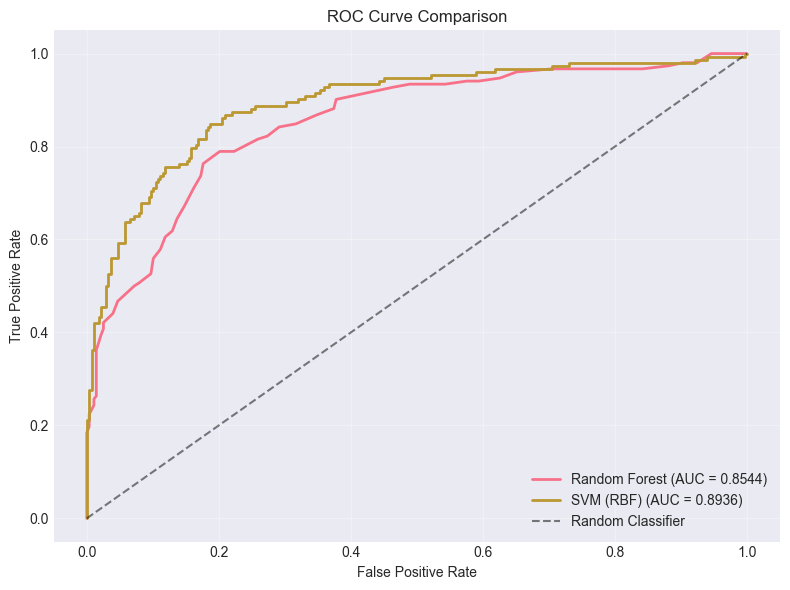


MODEL COMPARISON SUMMARY
Model                  Accuracy    ROC-AUC
------------------------------------------
Random Forest            0.7814     0.8544
SVM (RBF)                0.8233     0.8936


In [ ]:
# ============================================================
# 5.3 Evaluation — Metrics & Visualizations
# ============================================================

models = {
    'Random Forest': (y_pred_rf, y_prob_rf),
    'SVM (RBF)':     (y_pred_svm, y_prob_svm)
}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, (name, (y_pred, y_prob)) in enumerate(models.items()):
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    print("=" * 60)
    print(f"  {name}")
    print("=" * 60)
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  ROC-AUC:   {auc:.4f}")
    print(f"\n  Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Healthy', 'Alzheimer']))
    
    # Confusion matrix heatmap
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Healthy', 'Alzheimer'],
                yticklabels=['Healthy', 'Alzheimer'])
    axes[idx].set_title(f'{name}\nAccuracy: {acc:.4f} | AUC: {auc:.4f}')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# --- ROC Curve Comparison ---
fig, ax = plt.subplots(figsize=(8, 6))

for name, (y_pred, y_prob) in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    ax.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {auc:.4f})')

ax.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve Comparison')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Summary Table ---
print("\n" + "=" * 60)
print("MODEL COMPARISON SUMMARY")
print("=" * 60)
print(f"{'Model':<20} {'Accuracy':>10} {'ROC-AUC':>10}")
print("-" * 42)
for name, (y_pred, y_prob) in models.items():
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    print(f"{name:<20} {acc:>10.4f} {auc:>10.4f}")
print("=" * 60)